## Q1

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.feature_selection import VarianceThreshold

In [2]:
iris = load_iris()

X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

In [3]:
print(iris)
# print(X)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

### Applying Variance Thresholding

In [4]:
variance_threshold = VarianceThreshold(threshold=0.2)
X_variance_reduced = variance_threshold.fit_transform(X)

In [5]:
X_variance_reduced_df = pd.DataFrame(X_variance_reduced, columns=X.columns[variance_threshold.get_support()])

In [6]:
print("Data after variance thresholding:")
print(X_variance_reduced_df.head())

Data after variance thresholding:
   sepal length (cm)  petal length (cm)  petal width (cm)
0                5.1                1.4               0.2
1                4.9                1.4               0.2
2                4.7                1.3               0.2
3                4.6                1.5               0.2
4                5.0                1.4               0.2


In [7]:
# Correlaion Matrix
correlation_matrix = X.corr()
correlation_matrix

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


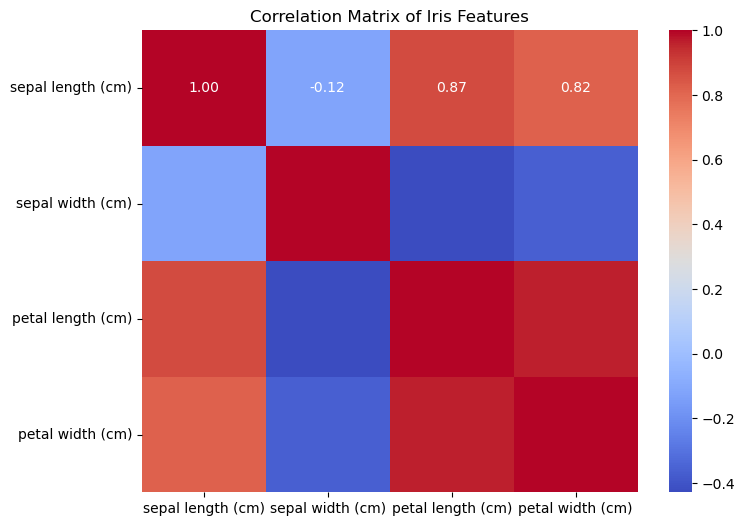

In [8]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix of Iris Features')
plt.show()

In [9]:
# Upper traingle of the correlation matrix

upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape),k=1).astype(bool))

In [10]:
highly_correlated_features = []
for i in range(upper_triangle.shape[0]):
    for j in range(i+1, upper_triangle.shape[1]):
        if upper_triangle.iloc[i, j] > 0.9:
            highly_correlated_features.append((X.columns[i], X.columns[j]))
print("\n Highly correlated features(correlation > 0.9)")
print(highly_correlated_features)


 Highly correlated features(correlation > 0.9)
[('petal length (cm)', 'petal width (cm)')]


In [11]:
features_to_remove = [feature[1] for feature in highly_correlated_features]
X_correlated_reduced = X.drop(columns=features_to_remove)

In [12]:
print("\nData after removing highly correlated features:")
print(X_correlated_reduced.head())


Data after removing highly correlated features:
   sepal length (cm)  sepal width (cm)  petal length (cm)
0                5.1               3.5                1.4
1                4.9               3.0                1.4
2                4.7               3.2                1.3
3                4.6               3.1                1.5
4                5.0               3.6                1.4
